# <center> Lending Club - Decision Tree & Ensemble Methods </center>

### *Method 1- Decision Tree Classifier*

**Decision Tree** *Decision Tree is one of the most commonly used classification techniques, which does a very good job at classifying people as people who will repay the loan or people who will default*

![Decisiontree](https://study.com/cimages/multimages/16/weather-decision-tree.jpg)

In [1]:
import pandas as pd
import graphlab as gl
from graphlab import SFrame
import os
import pandas_ml

In [207]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

**I save the cleaned file in a csv and read it in this.**

In [2]:
current_path=os.getcwd()

In [3]:
os.chdir(current_path+"//Lending Club")

In [9]:
df_new=pd.read_csv("Cleaned_Loan_Data.csv",index_col=False)

In [12]:
df_new=df_new.drop("Unnamed: 0",axis=1)

In [14]:
df_new["loan_status"]=df_new['loan_status'].map({'Default': 0, 'Fully Paid': 1})

In [407]:
cols=['tot_cur_bal',
      'loan_amnt',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'revol_util',
 'open_acc',
 'num_bc_tl',
 'num_il_tl',
 'num_rev_accts',
 'inq_last_12m',
 'mo_sin_old_rev_tl_op',
 'mths_since_recent_bc',
 'dti']

**x** *is our independent variables which we use to predict our **y** dataframe which is the **loan_status** column.*

In [408]:
x=df_new[cols]
y=df_new['loan_status']

*We go ahead here and normalize our dataset,since all of them are in different standards. We use the **sklearn.preprocessing** library*

In [409]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(np_scaled,columns=x.columns)

*Using the **sklearn.train_test_split** to split x and y. We do a 80-20 split on the dataset*

In [410]:
x_train,x_test,y_train,y_test=train_test_split(df_normalized,y,train_size=0.80,random_state=1)

In [411]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

**Confusion-Matrix** *is one of the most commonly used methods for checking the accuracy in a classification problem*

**Confusion-Matrix** *can be made using in 2 ways:*
1. *sklearn.metrics-confusion matrix*
2. *pandas_ml- ConfusionMatrix*

**Installing pandas_ml**
> ## pip install pandas_ml

In [412]:
from pandas_ml import ConfusionMatrix

![ConfusionMatrix](https://i.stack.imgur.com/OW5Lt.jpg)

*Using* **sklearn.DecisionTreeClassifier**

In [413]:
tree2= DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=5,random_state=100).fit(x_train,y_train)
pred=tree2.predict(x_test)
cm=ConfusionMatrix(np.array(y_test),np.array(pred))

*We get an accuracy of **60%**, before tuning the tree*

In [414]:
print("Accuracy of Decision Tree:",((pred==y_test).mean())*100)

('Accuracy of Decision Tree:', 60.825196387930404)


*We use the pandas_ml package to create a Confusion Matrix, one of the reasons behing using pandas_ml is because the **print_stats()** function gives us all the statistical detail about the **Confusion Matrix**.*

Predicted  False  True  __all__
Actual                         
False       1499  2653     4152
True        2683  6786     9469
__all__     4182  9439    13621
population: 13621
P: 9469
N: 4152
PositiveTest: 9439
NegativeTest: 4182
TP: 6786
TN: 1499
FP: 2653
FN: 2683
TPR: 0.71665434576
TNR: 0.361030828516
PPV: 0.718932090264
NPV: 0.358440937351
FPR: 0.638969171484
FDR: 0.281067909736
FNR: 0.28334565424
ACC: 0.608251963879
F1_score: 0.717791411043
MCC: 0.07752894385
informedness: 0.0776851742762
markedness: 0.0773730276143
prevalence: 0.695176565597
LRP: 1.12157890825
LRN: 0.784823986928
DOR: 1.4290833702
FOR: 0.641559062649
None


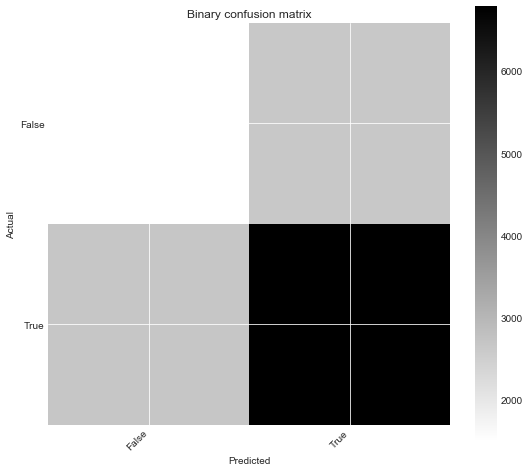

In [415]:
print(cm)
print(cm.print_stats())
cm.plot()

*2683 loans were missclassified as Fully Paid when they should have actually defaulted i.e. **19%**.*

In [571]:
n=x_test.shape[0]

In [575]:
dc=pd.DataFrame(confusion_matrix(y_test,pred))
print(dc)
print("The number of loans that were misclassified as Fully Paid when they should have been default:",dc[0][1])
print("Percent of loans that were misclassified",(float(dc[0][1])/float(n))*100)

      0     1
0  1499  2653
1  2683  6786
('The number of loans that were misclassified as Fully Paid when they should have been default:', 2683)
('Percent of loans that were misclassified', 19.697525879157183)


In [416]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### Plotting a ROC curve for Decision tree

In [455]:
def plotAUC(truth, pred):
    plt.figure(figsize=(7,5))
    sb.set_style("darkgrid")
    fpr, tpr, _ = roc_curve(truth,pred)
    roc_auc = roc_auc_score(truth,pred)
    plt.plot(fpr, tpr, color= "Blue",lw=2,marker="h", label= '(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color="#3498DB", lw=3, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

**Code-Reference-** *<a>https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python </a>*

**What is ROC curve?** *It is a curve plotted between sensitivity and 1-specificity.*
*To read more about ROC Curve you can use this link.<a> https://www.theanalysisfactor.com/what-is-an-roc-curve/ </a>*

**Area under Curve** *is plotted between **False positive and true positive rate**.*

In [418]:
fpr,tpr=calc_auc_roc(pred,y_test)

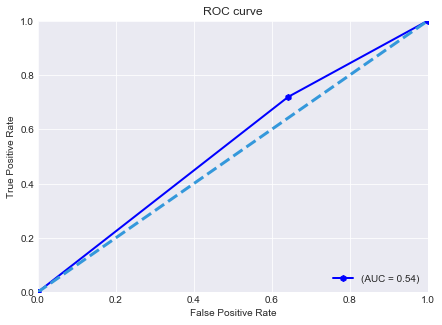

In [542]:
plotAUC(pred,y_test)

**Installing graphviz **
> ## pip install graphviz
> *graphviz need **PATH** set in the environment variables*
> *This library is used to display decision tree classifiers.*

In [34]:
from sklearn import tree as t
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO 

In [142]:
from subprocess import call

In [143]:
call(['dot','-T','png','TREE2.dot','-o','tree.png'])

0

In [93]:
t.export_graphviz(tree2,out_file='TREE2.dot')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0644009 to fit



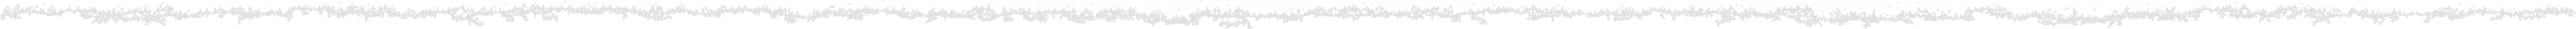

In [65]:
dot_data = t.export_graphviz(tree2, out_file=None, 
                                 rounded=True,
                                feature_names=cols,  
                                class_names="loan_status")

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### *Method 2: Decision Tree Classifier with GridSearchCV*

**GridSearchCV:** *This method is used to tune hyperparamaters. You can pass a parameter grid which can have multiple values for paramters and it will tell you the best estimator for the model. Grid Search also performs **k-fold cross validation** and tells the output after every iteration.*

**sklearn.model_selection- GridSearchCV**

In [97]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score

In [423]:
param_grid = {'max_depth': np.arange(3, 7, None),'min_samples_split':[50,100,500,1000],
              'min_samples_leaf':[10,50,100,500,1000],"max_leaf_nodes":np.arange(2,6,10),
              'criterion':['gini','entropy']}
print("Iterations for Decision Tree with Grid Seach :")
grid1 = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=3,verbose=3,refit=True)
grid1.fit(x_train, y_train)
pred_grid1=grid1.predict(x_test)
grid1_prob=grid1.predict_proba(x_test)[:,-1]
cm2=ConfusionMatrix(np.array(pred_grid1),np.array(y_test))

Iterations for Decision Tree with Grid Seach :
Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] min_samples_split=50, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=10 
[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=10, score=0.697940755423, total=   0.0s
[CV] min_samples_split=50, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=10 
[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=10, score=0.697979186168, total=   0.0s
[CV] min_samples_split=50, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=10, score=0.697979186168, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=10 
[CV]  min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=10, score=0.697940755423, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=10 
[CV]  min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=10, score=0.697979186168, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=10 
[CV]  min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=10, score=0.697979186168, total=   0.0s
[CV] min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=10 
[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=3, min_sampl

[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=500, score=0.697979186168, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=500 
[CV]  min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=500, score=0.697940755423, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=500 
[CV]  min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=500, score=0.697979186168, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=500 
[CV]  min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=500, score=0.697979186168, total=   0.0s
[CV] min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=3, min_samples_leaf=500 
[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=3, m

[CV]  min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=50, score=0.697979186168, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=50 
[CV]  min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=50, score=0.697979186168, total=   0.0s
[CV] min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=50 
[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=50, score=0.697940755423, total=   0.0s
[CV] min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=50 
[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=50, score=0.697979186168, total=   0.0s
[CV] min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=50 
[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samp

[CV]  min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=1000, score=0.697979186168, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=1000 
[CV]  min_samples_split=100, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=1000, score=0.697979186168, total=   0.0s
[CV] min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=1000 
[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=1000, score=0.697940755423, total=   0.0s
[CV] min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=1000 
[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=1000, score=0.697979186168, total=   0.0s
[CV] min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=4, min_samples_leaf=1000 
[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_d

[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=5, min_samples_leaf=100, score=0.697979186168, total=   0.0s
[CV] min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=5, min_samples_leaf=100 
[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=5, min_samples_leaf=100, score=0.697979186168, total=   0.0s
[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=5, min_samples_leaf=100 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=5, min_samples_leaf=100, score=0.697940755423, total=   0.0s
[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=5, min_samples_leaf=100 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=5, min_samples_leaf=100, score=0.697979186168, total=   0.0s
[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=5, min_samples_leaf=100 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_dep

[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=10, score=0.697979186168, total=   0.0s
[CV] min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=10 
[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=10, score=0.697979186168, total=   0.0s
[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=10 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=10, score=0.697940755423, total=   0.0s
[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=10 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=10, score=0.697979186168, total=   0.0s
[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=10 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=6, mi

[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=500, score=0.697979186168, total=   0.0s
[CV] min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=500 
[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=500, score=0.697979186168, total=   0.0s
[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=500 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=500, score=0.697940755423, total=   0.0s
[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=500 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=500, score=0.697979186168, total=   0.0s
[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_depth=6, min_samples_leaf=500 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=gini, max_dep

[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=entropy, max_depth=3, min_samples_leaf=50, score=0.697979186168, total=   0.0s
[CV] min_samples_split=500, max_leaf_nodes=2, criterion=entropy, max_depth=3, min_samples_leaf=50 
[CV]  min_samples_split=500, max_leaf_nodes=2, criterion=entropy, max_depth=3, min_samples_leaf=50, score=0.697979186168, total=   0.0s
[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=entropy, max_depth=3, min_samples_leaf=50 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=entropy, max_depth=3, min_samples_leaf=50, score=0.697940755423, total=   0.0s
[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=entropy, max_depth=3, min_samples_leaf=50 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=entropy, max_depth=3, min_samples_leaf=50, score=0.697979186168, total=   0.0s
[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=entropy, max_depth=3, min_samples_leaf=50 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criteri

[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=entropy, max_depth=3, min_samples_leaf=1000, score=0.697940755423, total=   0.0s
[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=entropy, max_depth=3, min_samples_leaf=1000 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=entropy, max_depth=3, min_samples_leaf=1000, score=0.697979186168, total=   0.0s
[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=entropy, max_depth=3, min_samples_leaf=1000 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=entropy, max_depth=3, min_samples_leaf=1000, score=0.697979186168, total=   0.0s
[CV] min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=4, min_samples_leaf=10 
[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=4, min_samples_leaf=10, score=0.697940755423, total=   0.0s
[CV] min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=4, min_samples_leaf=10 
[CV]  min_samples_split=50, max_leaf_nodes=2, cr

[CV] min_samples_split=1000, max_leaf_nodes=2, criterion=entropy, max_depth=4, min_samples_leaf=100 
[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=entropy, max_depth=4, min_samples_leaf=100, score=0.697979186168, total=   0.0s
[CV] min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=4, min_samples_leaf=500 
[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=4, min_samples_leaf=500, score=0.697940755423, total=   0.0s
[CV] min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=4, min_samples_leaf=500 
[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=4, min_samples_leaf=500, score=0.697979186168, total=   0.0s
[CV] min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=4, min_samples_leaf=500 
[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=4, min_samples_leaf=500, score=0.697979186168, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=

[CV]  min_samples_split=1000, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=10, score=0.697979186168, total=   0.0s
[CV] min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=50 
[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=50, score=0.697940755423, total=   0.0s
[CV] min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=50 
[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=50, score=0.697979186168, total=   0.0s
[CV] min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=50 
[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=50, score=0.697979186168, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=50 
[CV]  min_samples_split=100, max_leaf_nodes=2, criterion=entropy,

[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=1000, score=0.697940755423, total=   0.0s
[CV] min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=1000 
[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=1000, score=0.697979186168, total=   0.0s
[CV] min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=1000 
[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=1000, score=0.697979186168, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=1000 
[CV]  min_samples_split=100, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=1000, score=0.697940755423, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=entropy, max_depth=5, min_samples_leaf=1000 
[CV]  min_samples_split=100, max_leaf_nodes=2, cr

[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=6, min_samples_leaf=100, score=0.697979186168, total=   0.0s
[CV] min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=6, min_samples_leaf=100 
[CV]  min_samples_split=50, max_leaf_nodes=2, criterion=entropy, max_depth=6, min_samples_leaf=100, score=0.697979186168, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=entropy, max_depth=6, min_samples_leaf=100 
[CV]  min_samples_split=100, max_leaf_nodes=2, criterion=entropy, max_depth=6, min_samples_leaf=100, score=0.697940755423, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=entropy, max_depth=6, min_samples_leaf=100 
[CV]  min_samples_split=100, max_leaf_nodes=2, criterion=entropy, max_depth=6, min_samples_leaf=100, score=0.697979186168, total=   0.0s
[CV] min_samples_split=100, max_leaf_nodes=2, criterion=entropy, max_depth=6, min_samples_leaf=100 
[CV]  min_samples_split=100, max_leaf_nodes=2, criterio

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   32.0s finished


*Accuracy of this model has considerably increased to **69.5%**.*

In [424]:
print("Accuracy of the Decision Tree with GridSearch CV",((pred_grid1==y_test).mean())*100)

('Accuracy of the Decision Tree with GridSearch CV', 69.517656559723946)


In [425]:
print("The best estimator of our model: ",grid1.best_estimator_)

('The best estimator of our model: ', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))


In [426]:
df2=DecisionTreeClassifier(class_weight=None, criterion='entropy',
            max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best').fit(x_train,y_train)
pred2=df2.predict(x_test)

In [556]:
(pred2==y_test).mean()

0.6951765655972395

In [377]:
from sklearn.metrics import roc_curve

### *Method-3 Random Forest Classifier*

*Random Forest is an ensemble method used for both Classification and Regression. The base model is created based on the top predictor variables and the following models are built on this base model.*
 
 


**sklearn.ensemble-RandomForestClassifier**

In [433]:
from sklearn.ensemble import RandomForestClassifier

In [586]:
rf=RandomForestClassifier()

In [587]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [588]:
clf_pred=rf.predict(x_test)

*Estimators in Random Forest. Using the estimators_ parameter to get all the parameters in Random Forest.*

In [594]:
print("estimators from decision tree",rf.estimators_)

('estimators from decision tree', [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=460655539, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=333008731, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
  

*Tres methods in sklearn has a method **feature_importances** and you can get the weight of each feature*

In [471]:
imp_features=clf.feature_importances_

In [475]:
d = dict(zip(cols, imp_features))

Text(0.5,1,u'Feature Importance of Variables')

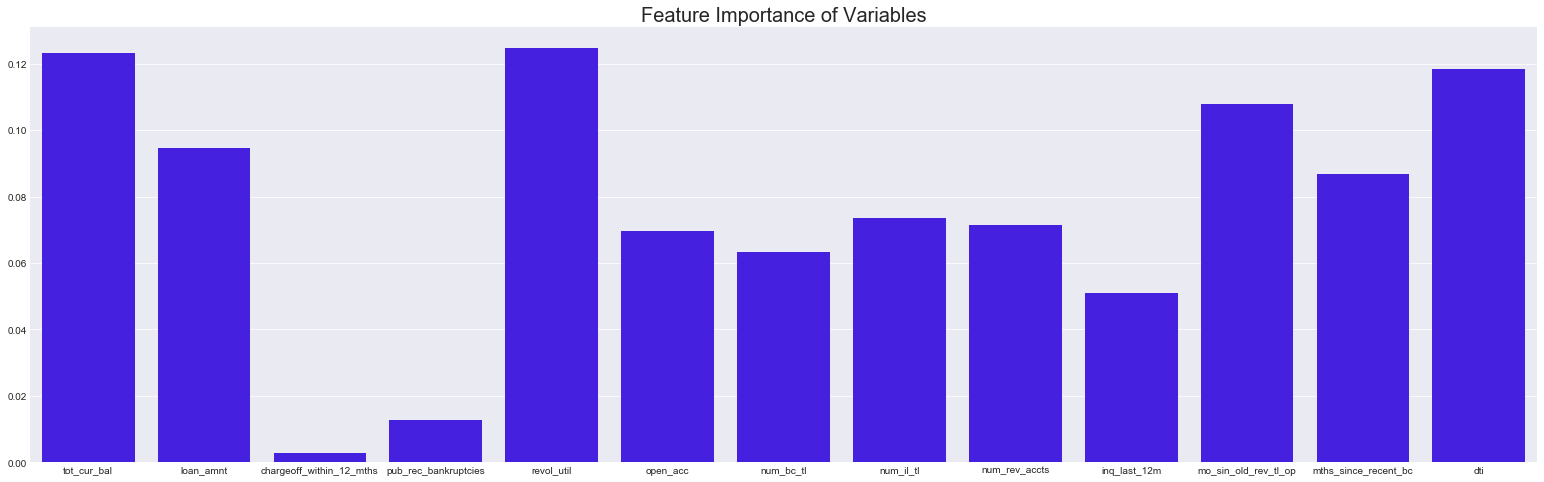

In [580]:
plt.figure(figsize=(27,8))
sb.barplot(x=cols,y=imp_features,color="#3300FF")
plt.title("Feature Importance of Variables",fontsize=20)

*We see that dti, revol_util and tot_cur_bal are most important features of the model*

*Accuracy of the Random Forest Classifier model is **66.59%**.*

In [461]:
print("Accuracy of Random Forest Classifier :",((y_test==clf_pred).mean())*100)

('Accuracy of Random Forest Classifier :', 66.595697819543346)


In [592]:
t.export_graphviz(rf.estimators_[0],out_file='RandomForest.dot')

*Confusion Matrix for Random Forest*

Predicted  False   True  __all__
Actual                          
False       1364   2788     4152
True        1762   7707     9469
__all__     3126  10495    13621
population: 13621
P: 9469
N: 4152
PositiveTest: 10495
NegativeTest: 3126
TP: 7707
TN: 1364
FP: 2788
FN: 1762
TPR: 0.813919104446
TNR: 0.328516377649
PPV: 0.734349690329
NPV: 0.436340371081
FPR: 0.671483622351
FDR: 0.265650309671
FNR: 0.186080895554
ACC: 0.665956978195
F1_score: 0.772089761571
MCC: 0.155924087895
informedness: 0.142435482095
markedness: 0.17069006141
prevalence: 0.695176565597
LRP: 1.21212056014
LRN: 0.566428063299
DOR: 2.13993733481
FOR: 0.563659628919
None


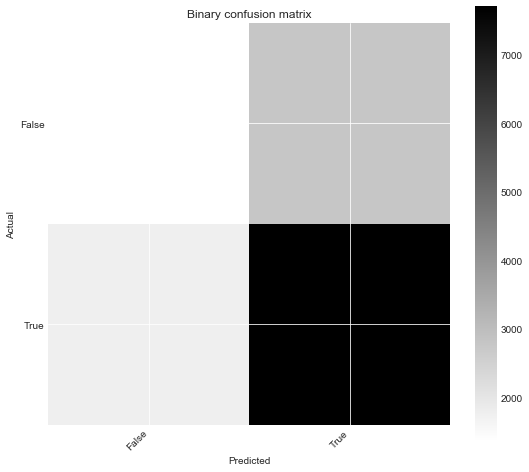

In [438]:
rf=ConfusionMatrix(np.array(y_test),np.array(clf_pred))
print(rf)
print(rf.print_stats())
rf.plot()

*The model has an accuracy of **66%** and the misclassification error rate is **20%**.*

In [614]:
rfcm_df=pd.DataFrame(confusion_matrix(clf_pred,y_test))
print(rfcm_df)
print("Number of missclassified loans that should be in the Default category",rfcm_df[0][1])
print("Percentage of missclassified loans that should be in Default category",(float(rfcm_df[0][1])/float(n))*100)

      0     1
0  1312  1793
1  2840  7676
('Number of missclassified loans that should be in the Default category', 2840)
('Percentage of missclassified loans that should be in Default category', 20.850157844504807)


**ROC Curve for Random Forest, The area under curve is 59%**

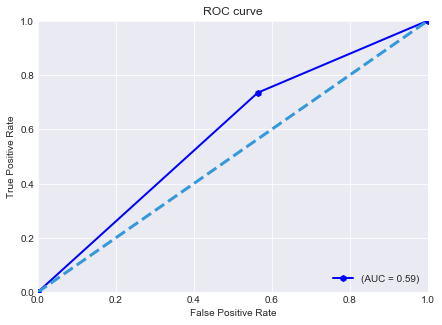

In [554]:
plotAUC(clf_pred,y_test)

### *Method  4-Random Forest Classifier RandomizedSearchCV*

**RandomizedSearchCV** *is a hyperparameter tuning model.*

*How is it different from GridSearch? Grid Search runs through all the iterations of the paramters whereas a Random Search just uses a random selection of the parameters.<a> http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html</a>.*

**sklearn.grid_search - RandomizedSearchCV **

In [457]:
from sklearn.grid_search import RandomizedSearchCV

In [458]:
rf_param_grid={"n_estimators":[10,15,20],
                "criterion":["gini","entropy"],
                "max_depth":[2,4,6,8],
                "min_samples_split":[2,3,4],
                 "min_samples_leaf":[1,2,3,4]}
rf_cv=RandomForestClassifier()
randomsearchcvmodel=RandomizedSearchCV(rf_cv,param_distributions=rf_param_grid,cv=10,n_iter=10).fit(x_train,y_train)

*Using the **get_params()** function of the tree and it tells us the parameters used in the method*

In [459]:
randomsearchcvmodel.get_params()

{'cv': 10,
 'error_score': 'raise',
 'estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'estimator__bootstrap': True,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 10,
 'estimator__n_jobs': 1,
 'estimator__oob_score': False,
 'estimator__random_state': None,


*Confusion Matrix for RandomizedSearchCV model*

Predicted  False   True  __all__
Actual                          
False        190   3962     4152
True         114   9355     9469
__all__      304  13317    13621
population: 13621
P: 9469
N: 4152
PositiveTest: 13317
NegativeTest: 304
TP: 9355
TN: 190
FP: 3962
FN: 114
TPR: 0.987960713909
TNR: 0.0457610789981
PPV: 0.702485544792
NPV: 0.625
FPR: 0.954238921002
FDR: 0.297514455208
FNR: 0.0120392860915
ACC: 0.700756185302
F1_score: 0.821118230492
MCC: 0.105087581195
informedness: 0.0337217929066
markedness: 0.327485544792
prevalence: 0.695176565597
LRP: 1.03533894098
LRN: 0.26309008343
DOR: 3.93530203601
FOR: 0.375
None


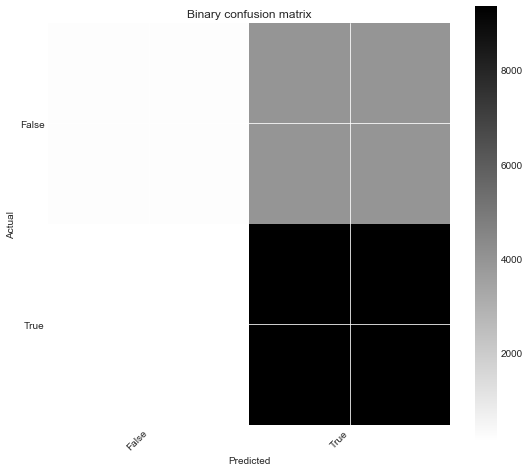

In [494]:
pred_random=randomsearchcvmodel.predict(x_test)
random=ConfusionMatrix(np.array(y_test),np.array(pred_random))
print(random)
print(random.print_stats())
random.plot()

In [606]:
print("Accuracy of random forest classifier using randomizedsearchCV:",(pred_random==y_test).mean()*100)

('Accuracy of random forest classifier using randomizedsearchCV:', 70.075618530210704)


*Accuracy of this model is **70**% and it misclassifies around **29%** percent default loans*

In [615]:
random_df=pd.DataFrame(confusion_matrix(pred_random,y_test))
print(random_df)
print("Loans that are classified as Fully Paid and are actually default",random_df[0][1])
print("Percentage of loans that are classified as default",(float(random_df[0][1])/float(n))*100)

      0     1
0   190   114
1  3962  9355
('Loans that are classified as Fully Paid and are actually default', 3962)
('Percentage of loans that are classified as default', 29.087438514059173)


### Plotting ROC curve for Randomized Search Random Forest

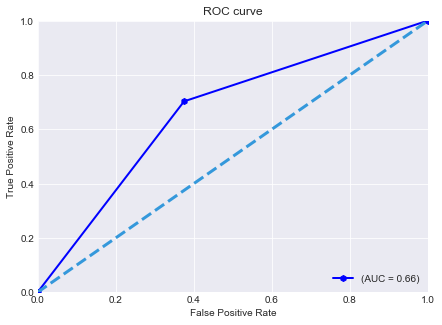

In [501]:
plotAUC(pred_random,y_test)

### *Method 5-Random Forest Classifier GridSearchCV *

In [502]:
grid_random=GridSearchCV(rf_cv, rf_param_grid,cv=4,verbose=3).fit(x_train,y_train)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits
[CV] min_samples_split=2, n_estimators=10, criterion=gini, max_depth=2, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=10, criterion=gini, max_depth=2, min_samples_leaf=1, score=0.69796637545, total=   0.1s
[CV] min_samples_split=2, n_estimators=10, criterion=gini, max_depth=2, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=10, criterion=gini, max_depth=2, min_samples_leaf=1, score=0.69796637545, total=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] min_samples_split=2, n_estimators=10, criterion=gini, max_depth=2, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=10, criterion=gini, max_depth=2, min_samples_leaf=1, score=0.69796637545, total=   0.1s
[CV] min_samples_split=2, n_estimators=10, criterion=gini, max_depth=2, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=10, criterion=gini, max_depth=2, min_samples_leaf=1, score=0.69796637545, total=   0.1s
[CV] min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=1, score=0.69796637545, total=   0.1s
[CV] min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=1, score=0.69796637545, total=   0.2s
[CV] min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=1 
[CV]  min_samples_split=2, n

[CV]  min_samples_split=2, n_estimators=10, criterion=gini, max_depth=2, min_samples_leaf=2, score=0.69796637545, total=   0.1s
[CV] min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=2, score=0.69796637545, total=   0.1s
[CV] min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=2, score=0.69796637545, total=   0.1s
[CV] min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=2, score=0.69796637545, total=   0.1s
[CV] min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=2, score=0.69796637545, total=

[CV]  min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=3, score=0.69796637545, total=   0.1s
[CV] min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=3, score=0.69796637545, total=   0.1s
[CV] min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=3, score=0.69796637545, total=   0.1s
[CV] min_samples_split=2, n_estimators=20, criterion=gini, max_depth=2, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=20, criterion=gini, max_depth=2, min_samples_leaf=3, score=0.69796637545, total=   0.2s
[CV] min_samples_split=2, n_estimators=20, criterion=gini, max_depth=2, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=20, criterion=gini, max_depth=2, min_samples_leaf=3, score=0.69796637545, total=

[CV]  min_samples_split=2, n_estimators=15, criterion=gini, max_depth=2, min_samples_leaf=4, score=0.69796637545, total=   0.1s
[CV] min_samples_split=2, n_estimators=20, criterion=gini, max_depth=2, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=20, criterion=gini, max_depth=2, min_samples_leaf=4, score=0.69796637545, total=   0.2s
[CV] min_samples_split=2, n_estimators=20, criterion=gini, max_depth=2, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=20, criterion=gini, max_depth=2, min_samples_leaf=4, score=0.69796637545, total=   0.2s
[CV] min_samples_split=2, n_estimators=20, criterion=gini, max_depth=2, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=20, criterion=gini, max_depth=2, min_samples_leaf=4, score=0.69796637545, total=   0.2s
[CV] min_samples_split=2, n_estimators=20, criterion=gini, max_depth=2, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=20, criterion=gini, max_depth=2, min_samples_leaf=4, score=0.69796637545, total=

[CV]  min_samples_split=2, n_estimators=20, criterion=gini, max_depth=4, min_samples_leaf=1, score=0.69796637545, total=   0.3s
[CV] min_samples_split=2, n_estimators=20, criterion=gini, max_depth=4, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=20, criterion=gini, max_depth=4, min_samples_leaf=1, score=0.698039791498, total=   0.3s
[CV] min_samples_split=2, n_estimators=20, criterion=gini, max_depth=4, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=20, criterion=gini, max_depth=4, min_samples_leaf=1, score=0.69796637545, total=   0.3s
[CV] min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=1 
[CV]  min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=1, score=0.698994200132, total=   0.1s
[CV] min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=1 
[CV]  min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=1, score=0.698039791498, tot

[CV]  min_samples_split=2, n_estimators=20, criterion=gini, max_depth=4, min_samples_leaf=2, score=0.698039791498, total=   0.3s
[CV] min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=2 
[CV]  min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=2, score=0.697892959401, total=   0.1s
[CV] min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=2 
[CV]  min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=2, score=0.698039791498, total=   0.1s
[CV] min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=2 
[CV]  min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=2, score=0.698260039645, total=   0.1s
[CV] min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=2 
[CV]  min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=2, score=0.698113207547, t

[CV]  min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=3, score=0.698186623596, total=   0.1s
[CV] min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=3 
[CV]  min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=3, score=0.698113207547, total=   0.1s
[CV] min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=3 
[CV]  min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=3, score=0.698333455693, total=   0.1s
[CV] min_samples_split=3, n_estimators=15, criterion=gini, max_depth=4, min_samples_leaf=3 
[CV]  min_samples_split=3, n_estimators=15, criterion=gini, max_depth=4, min_samples_leaf=3, score=0.698260039645, total=   0.2s
[CV] min_samples_split=3, n_estimators=15, criterion=gini, max_depth=4, min_samples_leaf=3 
[CV]  min_samples_split=3, n_estimators=15, criterion=gini, max_depth=4, min_samples_leaf=3, score=0.698039791498, t

[CV]  min_samples_split=3, n_estimators=10, criterion=gini, max_depth=4, min_samples_leaf=4, score=0.69796637545, total=   0.1s
[CV] min_samples_split=3, n_estimators=15, criterion=gini, max_depth=4, min_samples_leaf=4 
[CV]  min_samples_split=3, n_estimators=15, criterion=gini, max_depth=4, min_samples_leaf=4, score=0.698186623596, total=   0.2s
[CV] min_samples_split=3, n_estimators=15, criterion=gini, max_depth=4, min_samples_leaf=4 
[CV]  min_samples_split=3, n_estimators=15, criterion=gini, max_depth=4, min_samples_leaf=4, score=0.69796637545, total=   0.2s
[CV] min_samples_split=3, n_estimators=15, criterion=gini, max_depth=4, min_samples_leaf=4 
[CV]  min_samples_split=3, n_estimators=15, criterion=gini, max_depth=4, min_samples_leaf=4, score=0.698113207547, total=   0.2s
[CV] min_samples_split=3, n_estimators=15, criterion=gini, max_depth=4, min_samples_leaf=4 
[CV]  min_samples_split=3, n_estimators=15, criterion=gini, max_depth=4, min_samples_leaf=4, score=0.69796637545, tota

[CV]  min_samples_split=3, n_estimators=15, criterion=gini, max_depth=6, min_samples_leaf=1, score=0.699434696425, total=   0.3s
[CV] min_samples_split=3, n_estimators=15, criterion=gini, max_depth=6, min_samples_leaf=1 
[CV]  min_samples_split=3, n_estimators=15, criterion=gini, max_depth=6, min_samples_leaf=1, score=0.699581528522, total=   0.3s
[CV] min_samples_split=3, n_estimators=15, criterion=gini, max_depth=6, min_samples_leaf=1 
[CV]  min_samples_split=3, n_estimators=15, criterion=gini, max_depth=6, min_samples_leaf=1, score=0.699948608766, total=   0.3s
[CV] min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=1 
[CV]  min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=1, score=0.699801776668, total=   0.4s
[CV] min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=1 
[CV]  min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=1, score=0.698406871742, t

[CV]  min_samples_split=3, n_estimators=15, criterion=gini, max_depth=6, min_samples_leaf=2, score=0.700609353205, total=   0.3s
[CV] min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=2 
[CV]  min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=2, score=0.699581528522, total=   0.5s
[CV] min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=2 
[CV]  min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=2, score=0.699948608766, total=   0.5s
[CV] min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=2 
[CV]  min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=2, score=0.699654944571, total=   0.5s
[CV] min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=2 
[CV]  min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=2, score=0.699508112473, t

[CV]  min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=3, score=0.699581528522, total=   0.4s
[CV] min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=3 
[CV]  min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=3, score=0.699875192717, total=   0.5s
[CV] min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=3 
[CV]  min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=3, score=0.69972836062, total=   0.5s
[CV] min_samples_split=4, n_estimators=10, criterion=gini, max_depth=6, min_samples_leaf=3 
[CV]  min_samples_split=4, n_estimators=10, criterion=gini, max_depth=6, min_samples_leaf=3, score=0.699361280376, total=   0.2s
[CV] min_samples_split=4, n_estimators=10, criterion=gini, max_depth=6, min_samples_leaf=3 
[CV]  min_samples_split=4, n_estimators=10, criterion=gini, max_depth=6, min_samples_leaf=3, score=0.698773951986, to

[CV]  min_samples_split=3, n_estimators=20, criterion=gini, max_depth=6, min_samples_leaf=4, score=0.699654944571, total=   0.5s
[CV] min_samples_split=4, n_estimators=10, criterion=gini, max_depth=6, min_samples_leaf=4 
[CV]  min_samples_split=4, n_estimators=10, criterion=gini, max_depth=6, min_samples_leaf=4, score=0.699801776668, total=   0.2s
[CV] min_samples_split=4, n_estimators=10, criterion=gini, max_depth=6, min_samples_leaf=4 
[CV]  min_samples_split=4, n_estimators=10, criterion=gini, max_depth=6, min_samples_leaf=4, score=0.70031568901, total=   0.2s
[CV] min_samples_split=4, n_estimators=10, criterion=gini, max_depth=6, min_samples_leaf=4 
[CV]  min_samples_split=4, n_estimators=10, criterion=gini, max_depth=6, min_samples_leaf=4, score=0.698627119888, total=   0.2s
[CV] min_samples_split=4, n_estimators=10, criterion=gini, max_depth=6, min_samples_leaf=4 
[CV]  min_samples_split=4, n_estimators=10, criterion=gini, max_depth=6, min_samples_leaf=4, score=0.700976433448, to

[CV]  min_samples_split=4, n_estimators=10, criterion=gini, max_depth=8, min_samples_leaf=1, score=0.700389105058, total=   0.4s
[CV] min_samples_split=4, n_estimators=10, criterion=gini, max_depth=8, min_samples_leaf=1 
[CV]  min_samples_split=4, n_estimators=10, criterion=gini, max_depth=8, min_samples_leaf=1, score=0.701637177887, total=   0.4s
[CV] min_samples_split=4, n_estimators=10, criterion=gini, max_depth=8, min_samples_leaf=1 
[CV]  min_samples_split=4, n_estimators=10, criterion=gini, max_depth=8, min_samples_leaf=1, score=0.703692827252, total=   0.5s
[CV] min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=1 
[CV]  min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=1, score=0.700389105058, total=   0.8s
[CV] min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=1 
[CV]  min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=1, score=0.7009030174, tot

[CV]  min_samples_split=4, n_estimators=10, criterion=gini, max_depth=8, min_samples_leaf=2, score=0.700462521107, total=   0.2s
[CV] min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=2 
[CV]  min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=2, score=0.69972836062, total=   0.4s
[CV] min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=2 
[CV]  min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=2, score=0.701563761838, total=   0.5s
[CV] min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=2 
[CV]  min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=2, score=0.702444754423, total=   0.4s
[CV] min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=2 
[CV]  min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=2, score=0.703399163057, to

[CV]  min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=3, score=0.701637177887, total=   0.4s
[CV] min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=3 
[CV]  min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=3, score=0.700389105058, total=   0.4s
[CV] min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=3 
[CV]  min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=3, score=0.70266500257, total=   0.4s
[CV] min_samples_split=4, n_estimators=20, criterion=gini, max_depth=8, min_samples_leaf=3 
[CV]  min_samples_split=4, n_estimators=20, criterion=gini, max_depth=8, min_samples_leaf=3, score=0.70031568901, total=   0.6s
[CV] min_samples_split=4, n_estimators=20, criterion=gini, max_depth=8, min_samples_leaf=3 
[CV]  min_samples_split=4, n_estimators=20, criterion=gini, max_depth=8, min_samples_leaf=3, score=0.70266500257, tota

[CV]  min_samples_split=4, n_estimators=15, criterion=gini, max_depth=8, min_samples_leaf=4, score=0.700756185302, total=   0.5s
[CV] min_samples_split=4, n_estimators=20, criterion=gini, max_depth=8, min_samples_leaf=4 
[CV]  min_samples_split=4, n_estimators=20, criterion=gini, max_depth=8, min_samples_leaf=4, score=0.700095440863, total=   0.7s
[CV] min_samples_split=4, n_estimators=20, criterion=gini, max_depth=8, min_samples_leaf=4 
[CV]  min_samples_split=4, n_estimators=20, criterion=gini, max_depth=8, min_samples_leaf=4, score=0.701710593936, total=   0.7s
[CV] min_samples_split=4, n_estimators=20, criterion=gini, max_depth=8, min_samples_leaf=4 
[CV]  min_samples_split=4, n_estimators=20, criterion=gini, max_depth=8, min_samples_leaf=4, score=0.703178914911, total=   0.8s
[CV] min_samples_split=4, n_estimators=20, criterion=gini, max_depth=8, min_samples_leaf=4 
[CV]  min_samples_split=4, n_estimators=20, criterion=gini, max_depth=8, min_samples_leaf=4, score=0.702224506277, t

[CV]  min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=1, score=0.69796637545, total=   0.2s
[CV] min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=1 
[CV]  min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=1, score=0.69796637545, total=   0.2s
[CV] min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=1 
[CV]  min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=1, score=0.69796637545, total=   0.2s
[CV] min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=1 
[CV]  min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=1, score=0.69796637545, total=   0.2s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=2, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=2, min_samples_leaf=2, 

[CV]  min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=2, score=0.69796637545, total=   0.2s
[CV] min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=2 
[CV]  min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=2, score=0.69796637545, total=   0.2s
[CV] min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=2 
[CV]  min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=2, score=0.69796637545, total=   0.2s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=2, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=2, min_samples_leaf=3, score=0.69796637545, total=   0.1s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=2, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=2, min_samples_leaf=3, 

[CV]  min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=3, score=0.69796637545, total=   0.2s
[CV] min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=3 
[CV]  min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=3, score=0.69796637545, total=   0.2s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=2, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=2, min_samples_leaf=4, score=0.69796637545, total=   0.0s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=2, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=2, min_samples_leaf=4, score=0.69796637545, total=   0.1s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=2, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=2, min_samples_leaf=4, 

[CV]  min_samples_split=4, n_estimators=20, criterion=entropy, max_depth=2, min_samples_leaf=4, score=0.69796637545, total=   0.3s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=1, score=0.69796637545, total=   0.2s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=1, score=0.69796637545, total=   0.2s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=1, score=0.698186623596, total=   0.2s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=1,

[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=2, score=0.698039791498, total=   0.2s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=2, score=0.697892959401, total=   0.1s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=2, score=0.698186623596, total=   0.1s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=2, score=0.698113207547, total=   0.1s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=4, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=4, min_samples_leaf

[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=3, score=0.698039791498, total=   0.2s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=3, score=0.69796637545, total=   0.2s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=3, score=0.69796637545, total=   0.2s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=4, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=4, min_samples_leaf=3, score=0.698039791498, total=   0.3s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=4, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=4, min_samples_leaf=3

[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=4, score=0.698186623596, total=   0.1s
[CV] min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=4, min_samples_leaf=4, score=0.698039791498, total=   0.1s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=4, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=4, min_samples_leaf=4, score=0.698039791498, total=   0.2s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=4, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=4, min_samples_leaf=4, score=0.698260039645, total=   0.3s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=4, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=4, min_samples_leaf

[CV]  min_samples_split=2, n_estimators=10, criterion=entropy, max_depth=6, min_samples_leaf=1, score=0.699948608766, total=   0.5s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=1, score=0.69914103223, total=   0.5s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=1, score=0.698627119888, total=   0.5s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=1, score=0.700095440863, total=   0.4s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=

[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=2, score=0.699581528522, total=   0.4s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=2, score=0.699801776668, total=   0.4s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=2, score=0.70031568901, total=   0.4s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=2, score=0.699875192717, total=   0.4s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=6, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=6, min_samples_leaf=

[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=3, score=0.698700535937, total=   0.4s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=3, score=0.699287864327, total=   0.4s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=3, score=0.699214448278, total=   0.4s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=6, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=6, min_samples_leaf=3, score=0.69972836062, total=   0.6s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=6, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=6, min_samples_leaf=

[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=4, score=0.698847368035, total=   0.4s
[CV] min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=6, min_samples_leaf=4, score=0.700022024815, total=   0.4s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=6, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=6, min_samples_leaf=4, score=0.69914103223, total=   0.5s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=6, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=6, min_samples_leaf=4, score=0.699654944571, total=   0.5s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=6, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=6, min_samples_leaf=

[CV]  min_samples_split=2, n_estimators=15, criterion=entropy, max_depth=8, min_samples_leaf=1, score=0.700168856912, total=   0.5s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=1, score=0.700462521107, total=   0.8s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=1, score=0.701930842082, total=   0.7s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=1, score=0.701270097643, total=   0.7s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=1 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf

[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=2, score=0.700462521107, total=   0.8s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=2, score=0.701857426033, total=   0.8s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=2, score=0.701049849497, total=   0.7s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=2 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=2, score=0.700462521107, total=   0.7s
[CV] min_samples_split=3, n_estimators=10, criterion=entropy, max_depth=8, min_samples_leaf=2 
[CV]  min_samples_split=3, n_estimators=10, criterion=entropy, max_depth=8, min_samples_leaf

[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=3, score=0.70149034579, total=   0.9s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=3, score=0.699948608766, total=   0.7s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=3 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=3, score=0.701343513692, total=   0.7s
[CV] min_samples_split=3, n_estimators=10, criterion=entropy, max_depth=8, min_samples_leaf=3 
[CV]  min_samples_split=3, n_estimators=10, criterion=entropy, max_depth=8, min_samples_leaf=3, score=0.701123265546, total=   0.3s
[CV] min_samples_split=3, n_estimators=10, criterion=entropy, max_depth=8, min_samples_leaf=3 
[CV]  min_samples_split=3, n_estimators=10, criterion=entropy, max_depth=8, min_samples_leaf=

[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=4, score=0.70149034579, total=   0.7s
[CV] min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=4 
[CV]  min_samples_split=2, n_estimators=20, criterion=entropy, max_depth=8, min_samples_leaf=4, score=0.701343513692, total=   0.7s
[CV] min_samples_split=3, n_estimators=10, criterion=entropy, max_depth=8, min_samples_leaf=4 
[CV]  min_samples_split=3, n_estimators=10, criterion=entropy, max_depth=8, min_samples_leaf=4, score=0.700756185302, total=   0.3s
[CV] min_samples_split=3, n_estimators=10, criterion=entropy, max_depth=8, min_samples_leaf=4 
[CV]  min_samples_split=3, n_estimators=10, criterion=entropy, max_depth=8, min_samples_leaf=4, score=0.702297922326, total=   0.3s
[CV] min_samples_split=3, n_estimators=10, criterion=entropy, max_depth=8, min_samples_leaf=4 
[CV]  min_samples_split=3, n_estimators=10, criterion=entropy, max_depth=8, min_samples_leaf=

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1152 out of 1152 | elapsed:  9.2min finished


*Using the Best_estimator function of grid search to find out the best parameters that fit the RandomForest*

In [503]:
grid_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Predicted  False   True  __all__
Actual                          
False        259   3893     4152
True         174   9295     9469
__all__      433  13188    13621
population: 13621
P: 9469
N: 4152
PositiveTest: 13188
NegativeTest: 433
TP: 9295
TN: 259
FP: 3893
FN: 174
TPR: 0.981624247545
TNR: 0.0623795761079
PPV: 0.704807400667
NPV: 0.598152424942
FPR: 0.937620423892
FDR: 0.295192599333
FNR: 0.0183757524554
ACC: 0.701416929741
F1_score: 0.820496976652
MCC: 0.115461641855
informedness: 0.0440038236525
markedness: 0.30295982561
prevalence: 0.695176565597
LRP: 1.04693138346
LRN: 0.294579630096
DOR: 3.55398431018
FOR: 0.401847575058
None


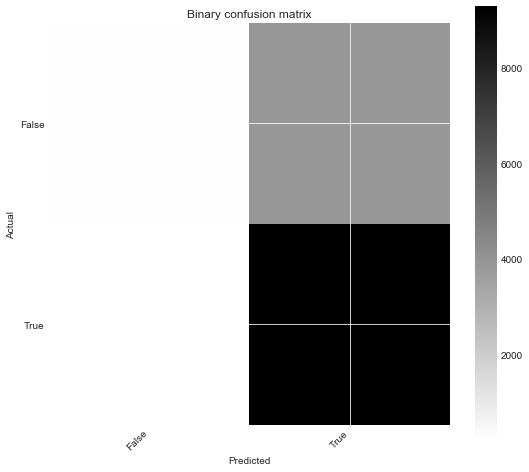

In [504]:
pred_random2=grid_random.predict(x_test)
con=ConfusionMatrix(np.array(y_test),np.array(pred_random2))
print(con)
print(con.print_stats())
con.plot()

### ROC Curve for Random Forest Grid Search

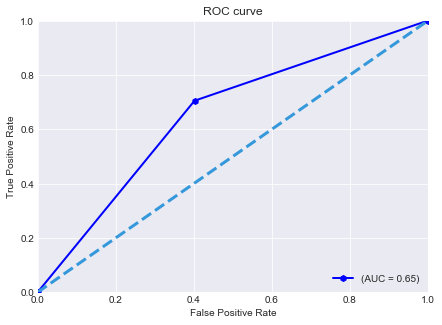

In [608]:
plotAUC(pred_random2,y_test)

**28%** *loans should have been in the default category but are actually in the Fully Paid category.*

In [616]:
random_df2=pd.DataFrame(confusion_matrix(pred_random2,y_test))
print(random_df2)
print("Loans that are classified as Fully Paid and are actually default",random_df2[0][1])
print("Percentage of loans that are classified as default",(float(random_df2[0][1])/float(n))*100)

      0     1
0   259   174
1  3893  9295
('Loans that are classified as Fully Paid and are actually default', 3893)
('Percentage of loans that are classified as default', 28.580867777696206)


In [612]:
print("Accuracy of Random Tree GridSearchCV",(pred_random2==y_test).mean()*100)

('Accuracy of Random Tree GridSearchCV', 70.141692974084137)


###  *Method -6 XgBoost*


*XGBoost (Extreme Gradient Boosting) is a scalable implementation of gradient boosting trees which help to improve the computing powers of decision trees. So far, we have seen an improving accuracy in our decision tree models. We try to implement XGBoost which should improve performance and speed of our overall predictive model*

**Installing XGBoost**
> ## pip install xgboost

*Using XGBClassifier from xgboost*

In [509]:
import xgboost
from xgboost import XGBClassifier

*For **xgboost** we can give a lost of parameter grid and the number of rounds the algorithm should run.*

In [512]:
params = {
    "learning_rate":0.1,
    "max_depth":10,
    "objective":'binary:logistic'}
num_round = 20 

*Xgboost uses DMatrix where it saves the label in the matrix as well.*

In [513]:
dtrain = xgboost.DMatrix(x_train, label=np.array(y_train))
dtest = xgboost.DMatrix(x_test, label=np.array(y_test))

In [515]:
clf=xgboost.train(params, dtrain, num_round)

In [516]:
clf.dump_model('dump.raw.txt')

*Using the predict function to get the proability and we decide a cutoff of 0.5 where probability less than 0.5 are default loans and probability greater than 0.5 are Fully Paid loans.*

In [517]:
pred_xg=clf.predict(dtest)

In [518]:
pred_xg[pred_xg>0.5]=1

In [519]:
pred_xg[pred_xg<=0.5]=0

In [520]:
cm_xg=ConfusionMatrix(np.array(y_test),np.array(pred_xg))

In [617]:
pred_xg_df=pd.DataFrame(confusion_matrix(pred_xg,y_test))
print(pred_xg_df)
print("Loans that are classified as Fully Paid and are actually default",pred_xg_df[0][1])
print("Percentage of loans that are classified as default",(float(pred_xg_df[0][1])/float(n))*100)

      0     1
0   675   573
1  3477  8896
('Loans that are classified as Fully Paid and are actually default', 3477)
('Percentage of loans that are classified as default', 25.52676014976874)


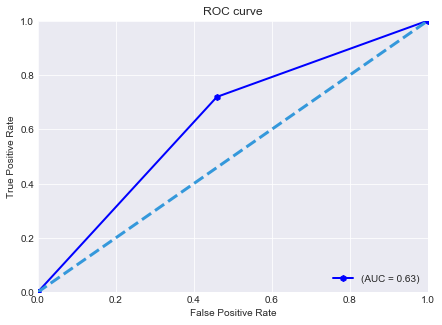

In [562]:
plotAUC(pred_xg,y_test)

In [530]:
param_grid_xg = {
    "learning_rate":0.1,
    "max_depth":14,
    "objective":'binary:logistic',
    "max_delta_step":2,
     "subsample":0.8}
num_round = 12 

In [531]:
clf_xg=xgboost.train(param_grid_xg, dtrain, num_round)

In [532]:
pred_xg2=clf_xg.predict(dtest)

In [533]:
pred_xg2[pred_xg2>0.5]=1

In [534]:
pred_xg2[pred_xg2<=0.5]=0

In [535]:
cm_xgml=ConfusionMatrix(np.array(y_test),np.array(pred_xg2))

In [536]:
cm_xgml.print_stats()

population: 13621
P: 9469
N: 4152
PositiveTest: 11947
NegativeTest: 1674
TP: 8651
TN: 856
FP: 3296
FN: 818
TPR: 0.913612841905
TNR: 0.206165703276
PPV: 0.724114840546
NPV: 0.511350059737
FPR: 0.793834296724
FDR: 0.275885159454
FNR: 0.0863871580948
ACC: 0.69796637545
F1_score: 0.807900635039
MCC: 0.167939403348
informedness: 0.119778545181
markedness: 0.235464900283
prevalence: 0.695176565597
LRP: 1.15088607997
LRN: 0.419018084591
DOR: 2.74662627294
FOR: 0.488649940263


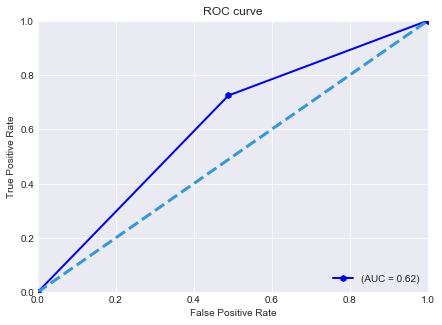

In [607]:
plotAUC(pred_xg2,y_test)

*We get an accuracy of **69%** and **24%** missclassified default loans as fully paid when they are actually default.*

In [618]:
pred_xg_df2=pd.DataFrame(confusion_matrix(pred_xg2,y_test))
print(pred_xg_df2)
print("Loans that are classified as Fully Paid and are actually default",pred_xg_df2[0][1])
print("Percentage of loans that are classified as default",(float(pred_xg_df2[0][1])/float(n))*100)

      0     1
0   856   818
1  3296  8651
('Loans that are classified as Fully Paid and are actually default', 3296)
('Percentage of loans that are classified as default', 24.1979296674253)


In [621]:
print("Accuracy of this model",(pred_xg2==y_test).mean()*100)

('Accuracy of this model', 69.796637544967339)
